# Crime Rates in Chicago between the years 2010 and 2024.

Based on the findings the crime rate in Chicago for the years 2010 to 2024 has increased expontially from the years 2020 to 2024. The data we used did not provide the full crime rates for years 2010 to 2019 with 741 crimes reported in 2010 and 147,291 crimes reported so far in 2024. 

In [68]:
#Kyle Branch 

In [69]:
#Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [70]:
#Store filepath as variable 
file = Path("Resources/Crimes_-_2010_to_2023.csv")

In [71]:
#Read data file with pandas
original_df = pd.read_csv(file)
original_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [72]:
#Cleaing data by removing columns
cleaned_df = original_df.drop(columns=['Case Number','IUCR', 'Beat', 'District', 'Community Area', 'FBI Code', 
                                      'X Coordinate', 'Y Coordinate', 'Location'])

cleaned_df.head()


,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Logitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [73]:
# Rename "Logitude" to "Longitude"
clean_df = cleaned_df.rename(columns={'Logitude ': 'Longitude'})
clean_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [74]:
# Checking data types
clean_df.dtypes


ID                        int64
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Ward                    float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

In [75]:
# Convert Ward to object type

clean_df['Ward'] = clean_df['Ward'].astype(str)
clean_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


In [76]:
clean_df.dtypes

ID                        int64
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Ward                     object
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

What are the six most common crimes in Chicago.

The six most common crimes in Chicago are as follows:
- Theft
- Battery
- Criminal Damage
- Motor Vehicle Theft
- Assault
- Deceptive Practice 

In [77]:
# What are the six most common crimes in Chicago

crime_counts = clean_df["Primary Type"].value_counts()
top_crimes = crime_counts.head(6)
top_crimes

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64

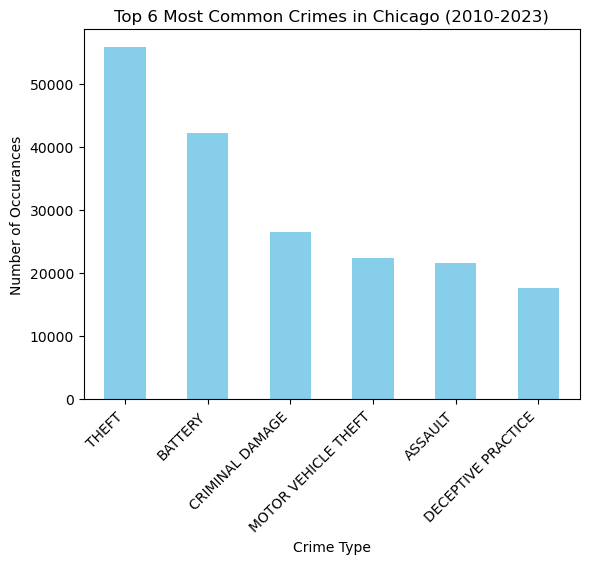

In [78]:
# Bar chart showing results

top_crimes.plot(kind='bar', color='skyblue')

# Add labels and title

plt.xlabel('Crime Type')
plt.ylabel('Number of Occurances')
plt.title("Top 6 Most Common Crimes in Chicago (2010-2023)")
plt.xticks(rotation=45, ha='right')

# Show and save the plot
plt.savefig("Images/Top_6_Common_Crimes.png")
plt.show()

Which wards are most & least affected by these crimes?

The wards most affected by these crimes are:
- 27
- 28
- 6
- 42
- 4
 

The wards lease affected by these crimes are:
- 13
- 19
- 23
- 38

In [79]:
# Identify the top 6 most common crimes
top_6_crimes = clean_df['Primary Type'].value_counts().head(6).index

# Filter the DataFrame for only the top 6 crimes
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Group by 'Ward' and count occurrences of these crimes
ward_crime_counts = filtered_df['Ward'].value_counts()

# Sort the wards by the number of these crimes
ward_crime_counts_sorted = ward_crime_counts.sort_values(ascending=False)

# Display the top 5 most affected wards
most_affected_wards = ward_crime_counts_sorted.head(5)
print("Most Affected Wards by Top 6 Crimes:")
print(most_affected_wards)


# Display the top 5 least affected wards
least_affected_wards = ward_crime_counts_sorted.tail(5)
print("\nLeast Affected Wards by Top 6 Crimes:")
print(least_affected_wards)




Most Affected Wards by Top 6 Crimes:
Ward
27.0    8110
28.0    7540
6.0     6638
42.0    6494
4.0     5832
Name: count, dtype: int64

Least Affected Wards by Top 6 Crimes:
Ward
13.0    1981
19.0    1914
23.0    1875
38.0    1645
nan        2
Name: count, dtype: int64


Is there a correlation between instance of crime and ward?

In the visualization below, the top 6 crimes are plotted against each ward. With an  R^2  value of 0.1027, there is a weak correlation between the top 6 crimes and the wards, indicating that the model explains only about 10.27% of the variability in crime counts across wards. This suggests that the relationship between the top 6 crimes and each ward is not strong.

The r-squared is: 0.1026534698157918


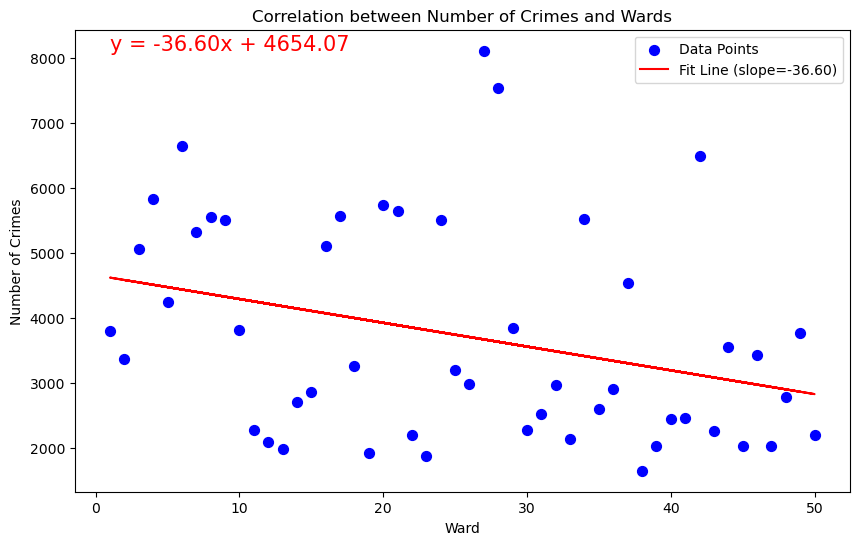

In [80]:

# Identify the top 6 crimes
top_6_crimes = clean_df['Primary Type'].value_counts().nlargest(6).index

# Filter the DataFrame for the top 6 crimes
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Count occurrences of crimes per ward
ward_crime_counts = filtered_df['Ward'].value_counts().reset_index()
ward_crime_counts.columns = ['Ward', 'Crime_Count']

# Convert 'Ward' to numeric and drop NaNs if necessary
ward_crime_counts['Ward'] = pd.to_numeric(ward_crime_counts['Ward'], errors='coerce')
ward_crime_counts.dropna(inplace=True)

# Calculate the correlation
slope, intercept, rvalue, pvalue, stderr = linregress(ward_crime_counts['Ward'], ward_crime_counts['Crime_Count'])
regress_values = ward_crime_counts['Ward'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(ward_crime_counts['Ward'], ward_crime_counts['Crime_Count'], s=50, color='blue', label='Data Points')
plt.plot(ward_crime_counts['Ward'], regress_values, "r-", label=f'Fit Line (slope={slope:.2f})')
plt.annotate(line_eq, (ward_crime_counts['Ward'].min(), ward_crime_counts['Crime_Count'].max()), fontsize=15, color="red")
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.title('Correlation between Number of Crimes and Wards')
plt.legend()

# Print R-squared value
print(f"The r-squared is: {rvalue**2}")

# Show and save the plot
plt.savefig("Images/Correlation_Crimes_Wards.png")
plt.show()

Which Location types show the highest rate of crime?

The locations with the highest rate of crime are:
- Street
- Apartment
- Residence
- Sidewalk
- Parking Lot / Garage (Non-Residential)

The locations with the lowest rate of crime are:
- Casino/Gambling Establishment
- CTA Tracks - Right of Way  
- Vehicle - Commerical: Entertainment / Party Bus 
- School, Private, Building
- Farm
 

Most Affected Locations by Top 6 Crimes:
Location Description
STREET                                    51986
APARTMENT                                 35590
RESIDENCE                                 21459
SIDEWALK                                   7549
PARKING LOT / GARAGE (NON RESIDENTIAL)     7219
Name: count, dtype: int64


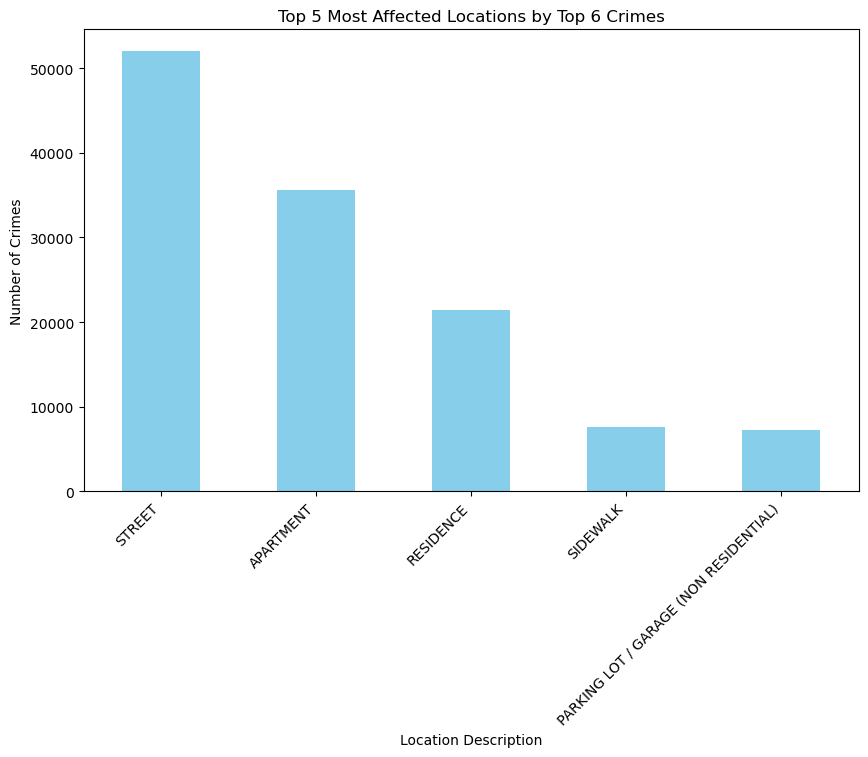


Least Affected Locations by Top 6 Crimes:
Location Description
CASINO/GAMBLING ESTABLISHMENT                      2
CTA TRACKS - RIGHT OF WAY                          1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS    1
SCHOOL, PRIVATE, BUILDING                          1
FARM                                               1
Name: count, dtype: int64


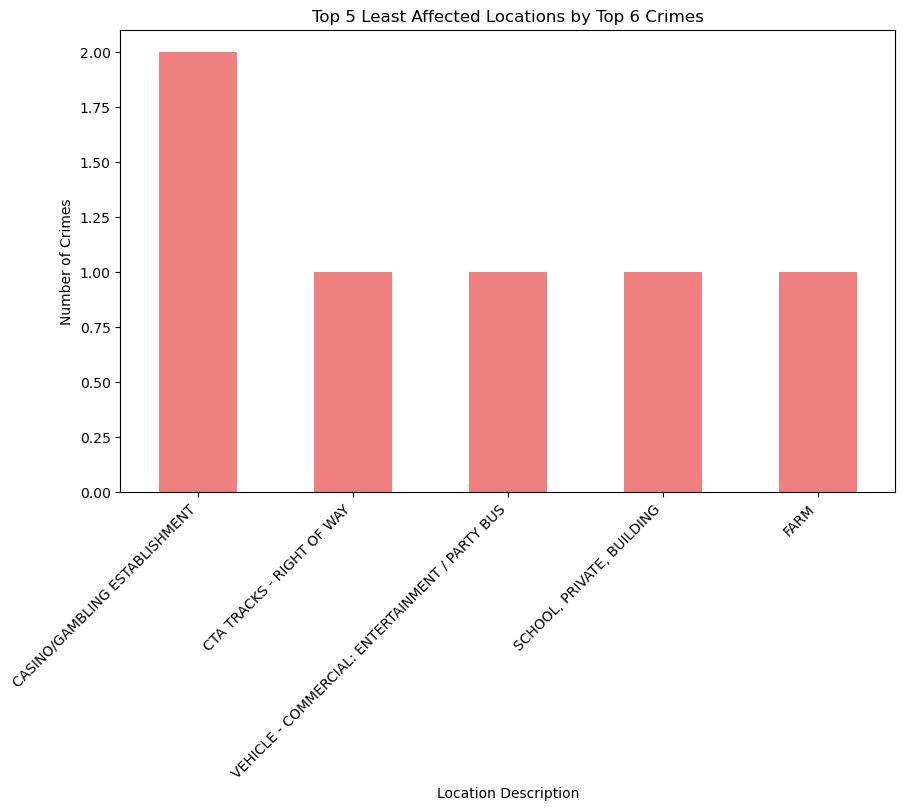

In [81]:
# Identify the top 6 most common crimes

top_6_crimes = clean_df['Primary Type'].value_counts().head(6).index

# Filter the DataFrame for only the top 6 crimes
filtered_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Group by 'Ward' and count occurrences of these crimes
location_crime_counts = filtered_df['Location Description'].value_counts()

# Sort the wards by the number of these crimes
location_crime_counts_sorted = location_crime_counts.sort_values(ascending=False)

# Display the top 5 most affected wards
most_affected_locations = location_crime_counts_sorted.head(5)
print("Most Affected Locations by Top 6 Crimes:")
print(most_affected_locations)
plt.figure(figsize=(10, 6))
most_affected_locations.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Most Affected Locations by Top 6 Crimes')
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.savefig("Images/Most_Affected_Locations.png")
plt.show()

# Display the top 5 least affected wards
least_affected_locations = location_crime_counts_sorted.tail(5)
print("\nLeast Affected Locations by Top 6 Crimes:")
print(least_affected_locations)

plt.figure(figsize=(10, 6))
least_affected_locations.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Least Affected Locations by Top 6 Crimes')
plt.xticks(rotation=45, ha="right")

# Show and save the plot
plt.savefig("Images/Least_Affected_Locations.png")
plt.show()

How has the prevalence of these crimes changed over time?

Based on the data provided, there is a significant increase in the top six crimes starting in 2020, with a notable rise in 2022. This increase may be partly due to incomplete crime data from the years 2010 to 2019.

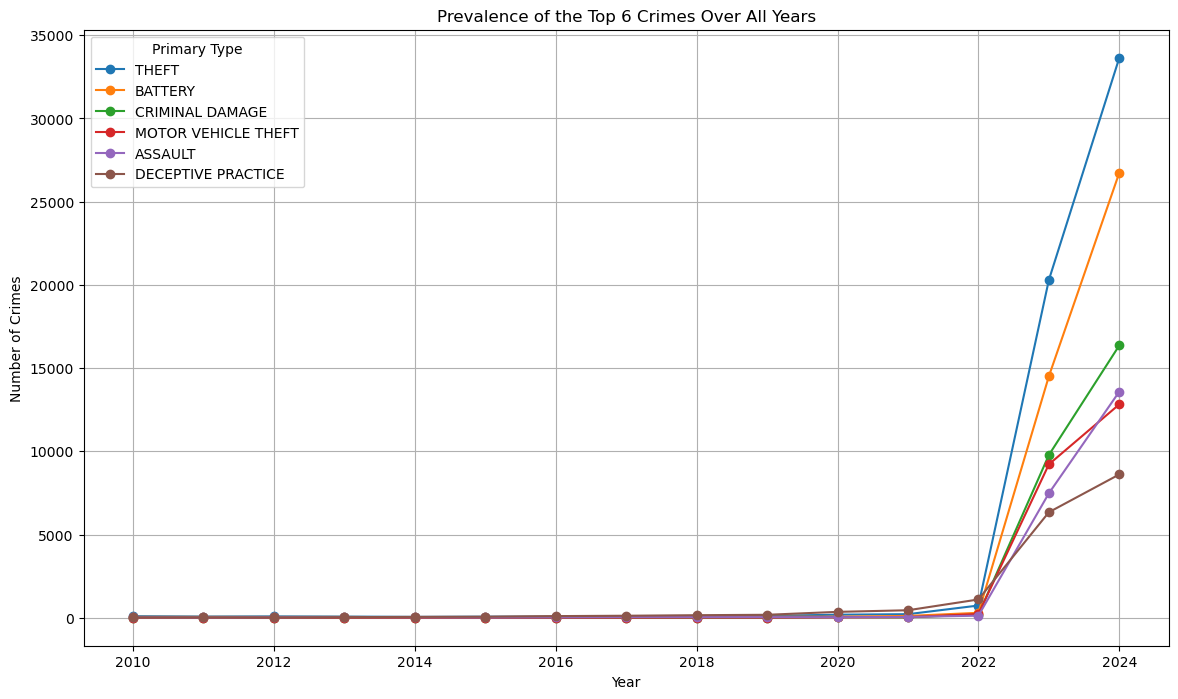

In [82]:
# How has the prevalence of these crimes changed over time?
# Filter the DataFrame for the top 6 crimes
top_6_crime_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes)]

# Group by 'Year' and 'Primary Type' and count the occurrences
yearly_crime_counts = top_6_crime_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime_Count')

# Plotting
plt.figure(figsize=(14, 8))

# Plot each crime type separately
for crime in top_6_crimes:
    crime_data = yearly_crime_counts[yearly_crime_counts['Primary Type'] == crime]
    plt.plot(crime_data['Year'], crime_data['Crime_Count'], marker='o', label=crime)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Prevalence of the Top 6 Crimes Over All Years')

# Show legend
plt.legend(title='Primary Type')

# Enable grid
plt.grid(True)

# Show and save the plot
plt.savefig("Images/Prevalence_of_the_top_6_crimes.png")
plt.show()

How do arrest rates compare to crime rates?

Arrest rates are significantly lower than crime rates, particularly in the years 2022 and 2023. This noticeable disparity could be attributed to various factors, such as changes in law enforcement strategies, shifts in crime reporting practices, or evolving legal standards. Additionally, there may be external factors like resource limitations or changes in community-police interactions that contribute to this trend. Understanding these underlying reasons requires a detailed examination of both law enforcement data and broader social factors to fully grasp the causes behind the reduced arrest rates relative to crime rates.

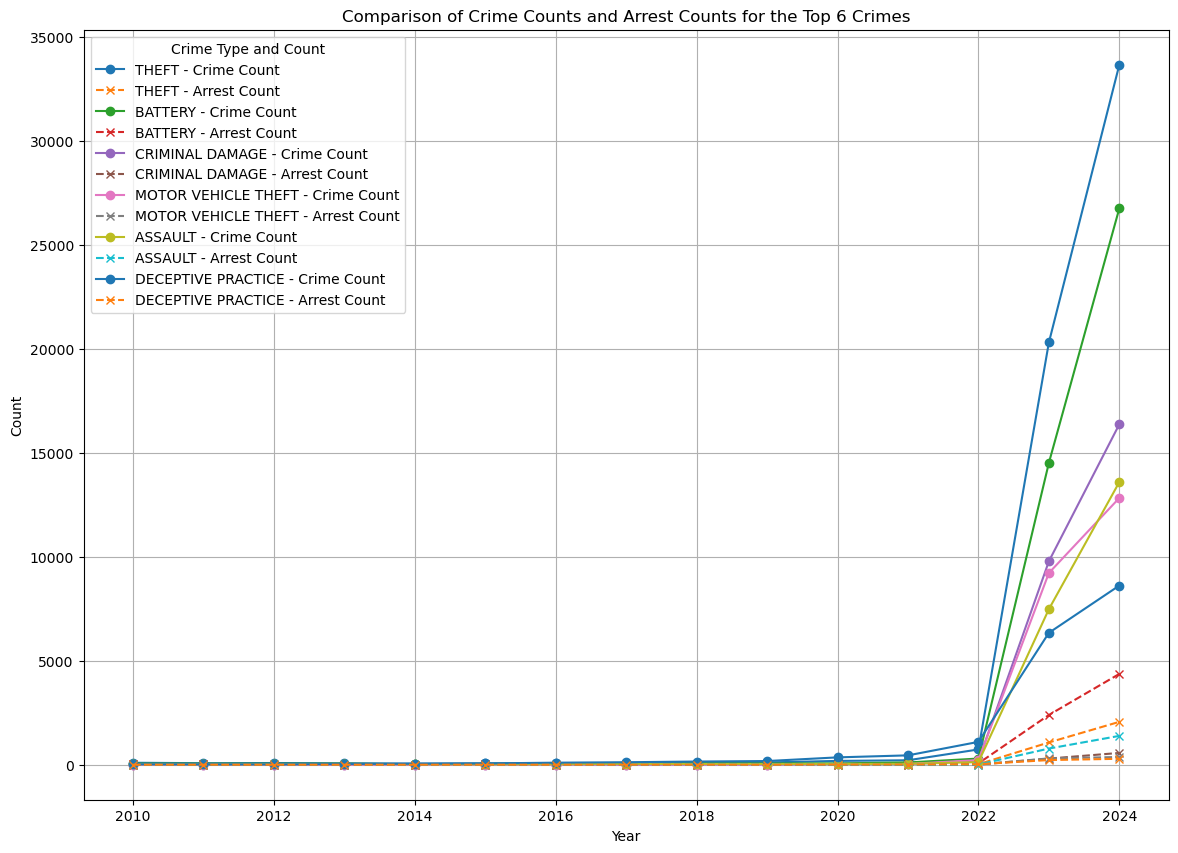

In [84]:
top_6_arrests_df = clean_df[clean_df['Primary Type'].isin(top_6_crimes) & (clean_df['Arrest'] == True)]

# Group by 'Year' and 'Primary Type' and count the occurrences
yearly_arrest_counts = top_6_arrests_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Arrest_Count')

# Merge crime counts with arrest counts
merged_counts = pd.merge(yearly_crime_counts, yearly_arrest_counts, on=['Year', 'Primary Type'], how='left')
merged_counts['Arrest_Count'] = merged_counts['Arrest_Count'].fillna(0)

# Plotting
plt.figure(figsize=(14, 10))

# Plot each crime type separately
for crime in top_6_crimes:
    crime_data = merged_counts[merged_counts['Primary Type'] == crime]
    plt.plot(crime_data['Year'], crime_data['Crime_Count'], marker='o', label=f'{crime} - Crime Count')
    plt.plot(crime_data['Year'], crime_data['Arrest_Count'], marker='x', linestyle='--', label=f'{crime} - Arrest Count')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Comparison of Crime Counts and Arrest Counts for the Top 6 Crimes')

# Show legend
plt.legend(title='Crime Type and Count')

# Enable grid
plt.grid(True)

# Show and save the plot
plt.savefig("Images/Crime_vs_Arrest_Counts.png")
plt.show()

How have arrest rates changed from 2022 to 2023?

Based on the data and graph below, arrest rates have fallen significantly from 2022 to 2023. Arrest rates are notably lower than crime rates, especially during these years. This decline could be due to several factors, including changes in law enforcement practices, variations in reporting or recording of incidents, or other contextual elements that have not been fully explored. Further investigation is needed to understand the underlying causes of this trend.


   Year  Arrest_Rate
0  2022    16.454566
1  2023    12.378765


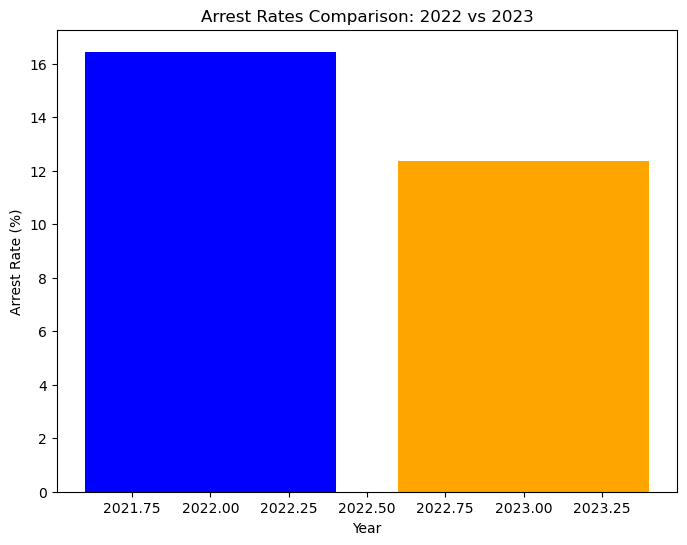

In [33]:
# How have arrest rates changed from 2022 to 2023?

# Filter the DataFrame for the years 2022 and 2023
filtered_df = clean_df[clean_df['Year'].isin([2022, 2023])]

# Calculate the total number of crimes for each year
yearly_crime_counts = filtered_df.groupby('Year').size().reset_index(name='Crime_Count')

# Calculate the total number of arrests for each year
yearly_arrest_counts = filtered_df[filtered_df['Arrest'] == True].groupby('Year').size().reset_index(name='Arrest_Count')

# Merge the crime counts and arrest counts
combined_data = pd.merge(yearly_crime_counts, yearly_arrest_counts, on='Year', how='left')

# Calculate the arrest rate as a percentage
combined_data['Arrest_Rate'] = (combined_data['Arrest_Count'] / combined_data['Crime_Count']) * 100

# Print the arrest rates for 2022 and 2023
print(combined_data[['Year', 'Arrest_Rate']])

# Plotting the arrest rates for 2022 and 2023
plt.figure(figsize=(8, 6))
plt.bar(combined_data['Year'], combined_data['Arrest_Rate'], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rates Comparison: 2022 vs 2023')

# Show and sve the plot
plt.savefig("Images/Arrest_Rates_Comparison.png")
plt.show()

In [34]:
# Calculate summary statistics for crimes per year
crime_summary = yearly_crime_counts['Crime_Count'].describe()
print(crime_summary)

count        2.000000
mean     47090.500000
std      60261.761213
min       4479.000000
25%      25784.750000
50%      47090.500000
75%      68396.250000
max      89702.000000
Name: Crime_Count, dtype: float64


In [35]:
# Group by year and count the number of crimes
yearly_crime_counts = clean_df.groupby('Year').size().reset_index(name='Crime_Count')
yearly_crime_counts

,Year,Crime_Count
0,2010,731
1,2011,691
2,2012,762
3,2013,714
4,2014,714
5,2015,828
6,2016,1173
7,2017,1104
8,2018,1149
9,2019,1042
